### calculates the price of a zero coupon bond at time t for maturity T under the CIR model


In [1]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
from math import *

np.random.seed(402)

In [2]:

def zeroCouponPricer(a,b,tau,sigma,rt,fv): 
    
    gamma = (a**2 + 2*sigma**2)**0.5
    
    const_1 = a+gamma
    const_2 = np.exp(gamma*tau)
    const_3 = np.add(gamma-a, np.multiply(const_1,const_2))
    
    A = np.multiply((2*a*b)/sigma**2, np.log(np.divide(np.multiply(2*gamma,np.exp(const_1*tau*0.5)),const_3)))
    B = np.divide(np.multiply(2,const_2-1), const_3)
    P = np.exp(np.subtract(A, np.multiply(B,rt)))

    return np.multiply(P,fv)

In [3]:

fv = 100  #amount to be paid at maturity
r = 0.04
a = 0.2
b = 0.041
sigma = 0.05
Tau = [0.25,0.5,0.75,1,2,3,4,5,6,7,8,9,10,15,20,30]

zeroBond_price = []
for tau in Tau:
    price = zeroCouponPricer(a,b,tau,sigma,r,fv)
    zeroBond_price.append(price)

zeroBond_price

[99.00439962572631,
 98.0176862172811,
 97.03996879631873,
 96.07132917045287,
 92.28840523201828,
 88.6521351303009,
 85.16016806830541,
 81.80835592707963,
 78.59164873998047,
 75.50463007203928,
 72.5418268555234,
 69.6978804621292,
 66.96763410741319,
 54.85842672777012,
 44.95278654693579,
 30.192624587399365]

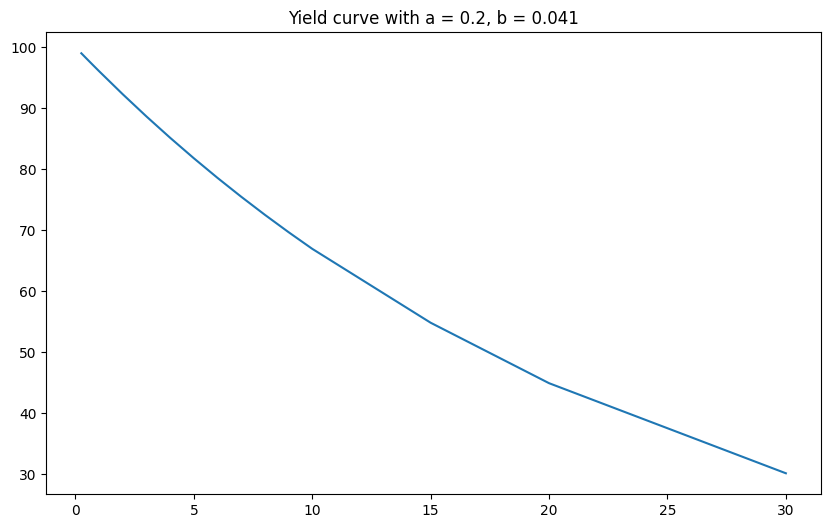

In [4]:
# Plot yield curve

plt.figure(figsize=(10,6))
plt.plot(Tau, zeroBond_price)
plt.title(f'Yield curve with a = {a}, b = {b}')
plt.show()

In [5]:

b = 0.05
new_zeroBond_price = []
for tau in Tau:
    price = zeroCouponPricer(a,b,tau,sigma,r,fv)
    new_zeroBond_price.append(price)

new_zeroBond_price

[98.99892251735423,
 97.99635273642649,
 96.99322559184353,
 95.99040167330544,
 91.9970308553529,
 88.06129672086676,
 84.21221407585773,
 80.46961111576,
 76.8465261683961,
 73.3509916127441,
 69.98736013521089,
 66.75729116369577,
 63.660485455732186,
 50.08638936287374,
 39.333641410787095,
 24.221736269673517]

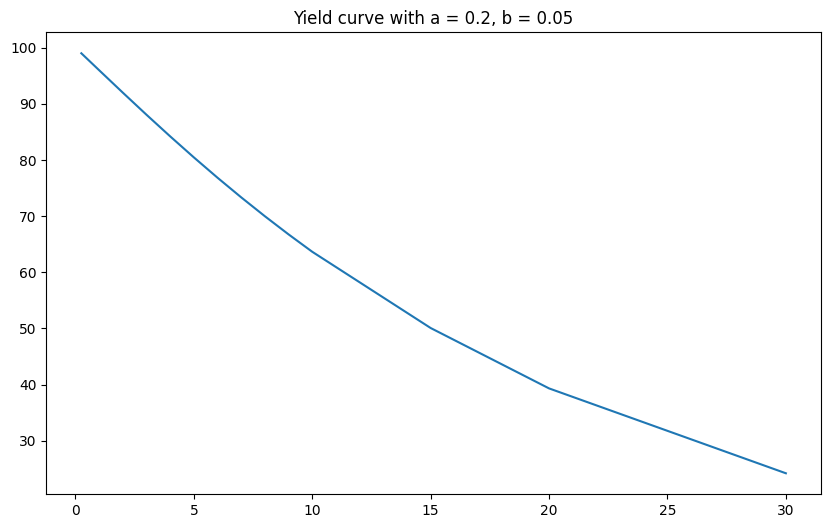

In [6]:
plt.figure(figsize=(10,6))
plt.plot(Tau, new_zeroBond_price)
plt.title(f'Yield curve with a = {a}, b = {b}')
plt.show()

In [14]:

a = 0.3
b = 0.04
q3f_P = []
for tau in Tau:
    price = zeroCouponPricer(a,b,tau,sigma,r,fv)
    q3f_P.append(price)

q3f_P

[99.00500775589464,
 98.0200500699582,
 97.045131589765,
 96.08022987067741,
 92.31966201548568,
 88.7134161965254,
 85.25476644499427,
 81.93659410489913,
 78.75201032372455,
 75.69457945185832,
 72.75836150558077,
 69.937880597351,
 67.22806951669675,
 55.183708754559326,
 45.30165748248772,
 30.531009851228742]

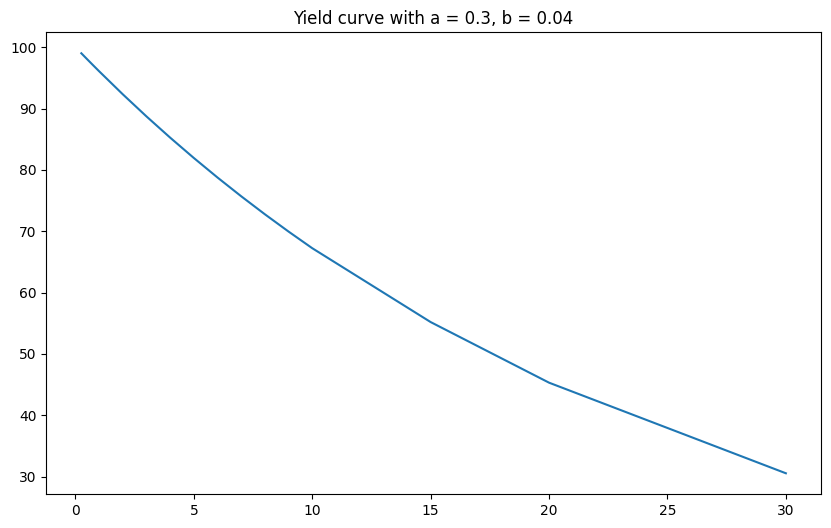

In [15]:
plt.figure(figsize=(10,6))
plt.plot(Tau, q3f_P)
plt.title(f'Yield curve with a = {a}, b = {b}')
plt.show()

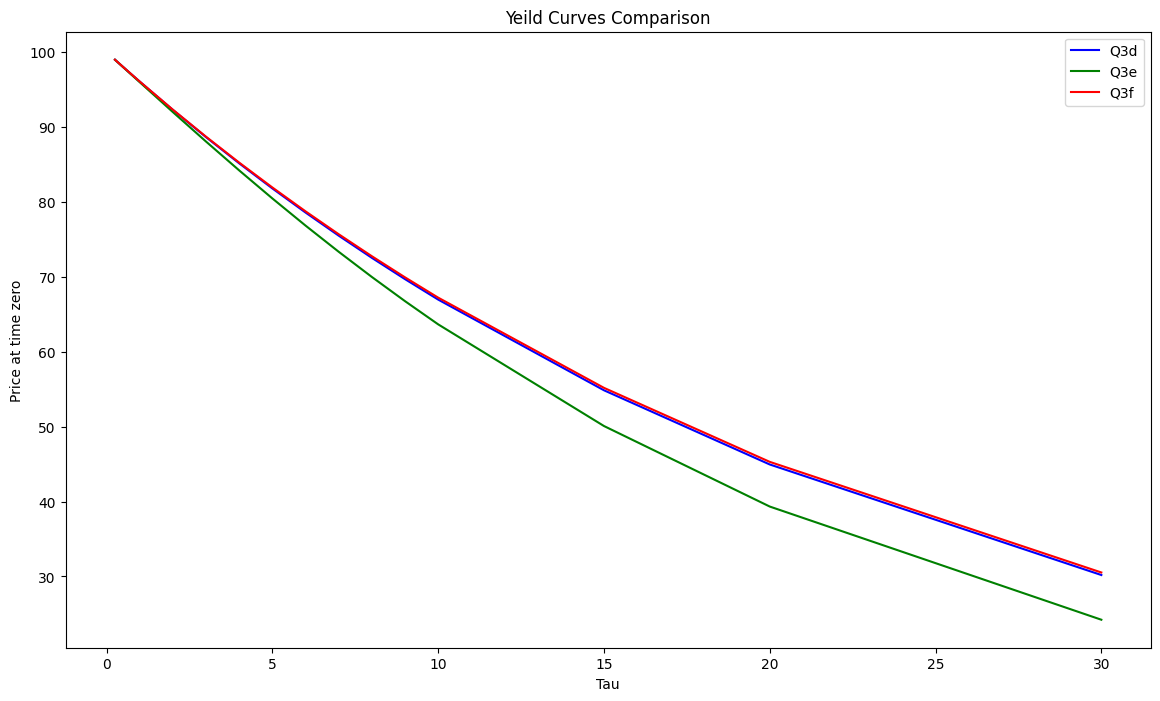

In [16]:


# the yield curve from d and f are (almost) the same, however the yield curve calculated by bond price with b =0.05 is slighly steeper than the other two
plt.figure(figsize=(14,8))
plt.plot(Tau,zeroBond_price,'b',label='Q3d')
plt.plot(Tau,new_zeroBond_price,'g',label='Q3e')
plt.plot(Tau,q3f_P,'r',label='Q3f')
plt.legend()
plt.xlabel('Tau')
plt.ylabel('Price at time zero')
plt.title('Yeild Curves Comparison')
plt.show()

##### Implement a Monte-Carlo algorithm to estimate the time-zero price of the zero coupon bond that matures at time T = 1 if the parameters of the CIR model are r0 = 0.04, a = 0.2, b = 0.041, and σ = 0.05. Use a partition Δt = T/m for m = 252 trading days and N = 104 sample paths. Report your Monte-Carlo estimate and a 95% confidence interval for the bond price. Compare the result to that obtained using the exact formula given in Question 3.

In [17]:

def shortRatePath_CIR(r0, a, b, sigma, 
                          steps, T):
    dt = T/steps
    #size = (Npaths, steps)
    #prices = np.zeros(size)
    short_r = np.zeros(steps)
    short_r[0] = r0
    Z = np. random.normal(0, 1, steps)
    const = sigma * np.sqrt(dt)  * Z
    
    for i in range(1, steps):
        if short_r[i-1] < 0:
            short_r[i-1]= 0
        short_r[i]= short_r[i-1] + a*(b - short_r[i-1]) * dt + np.sqrt(short_r[i-1]) * const[i]
        
    
    return short_r

In [11]:

def aggRatePath_CIR(r0, a, b, sigma,  T, steps):
    dt = T/steps

    #Z = np. random.normal(0, 1, steps)
    #const = sigma * np.sqrt(dt)  * Z
    rate = r0
    result_sum = 0
    
    for i in range(1, steps):
        Z = np. random.normal(0, 1)
        rate= rate + a*(b - rate) * dt + sigma * np.sqrt(rate) *np.sqrt(dt)  * Z
        result_sum += rate
    

    result = dt * result_sum
    return result

In [12]:

def shortRatePath_CIR(r0, a, b, sigma, 
                          steps, T, N):
    dt = T/steps
    size = (steps, N)
    #prices = np.zeros(size)
    short_r = np.zeros(size)
    short_r[0] = r0
    Z = np. random.normal(0, 1, steps *N)
    const = sigma * np.sqrt(dt)  * Z
    
    for i in range(1, steps):
        short_r[i]= short_r[i-1] + a*(b - short_r[i-1]) * dt + const[i]
        
    
    return short_r

In [19]:
def VasicekNextRate(r, kappa, theta, sigma, dt=1/252):
    # Implements above closed form solution
    val1 = np.exp(-1*kappa*dt)
    val2 = (sigma**2)*(1-val1**2) / (2*kappa)
    out = r*val1 + theta*(1-val1) + (np.sqrt(val2))*np.random.normal()
    return out
# Vasicek simulation short rate
def VasicekSim(N, r0, kappa, theta, sigma, dt = 1/252):
    short_r = [0]*N # Create array to store rates
    short_r[0] = r0 # Initialize rates at $r_0$
    for i in range(1,N):
        short_r[i]=VasicekNextRate(short_r[i-1],kappa, theta, sigma, dt)
    return short_r
# Vasicek multi-simulation
def VasicekMultiSim(M, N, r0, kappa, theta, sigma, dt = 1/252):
    sim_arr = np.ndarray((N, M))
    for i in range(0,M):
        sim_arr[:, i] = VasicekSim(N, r0, kappa, theta, sigma, dt)
    return sim_arr




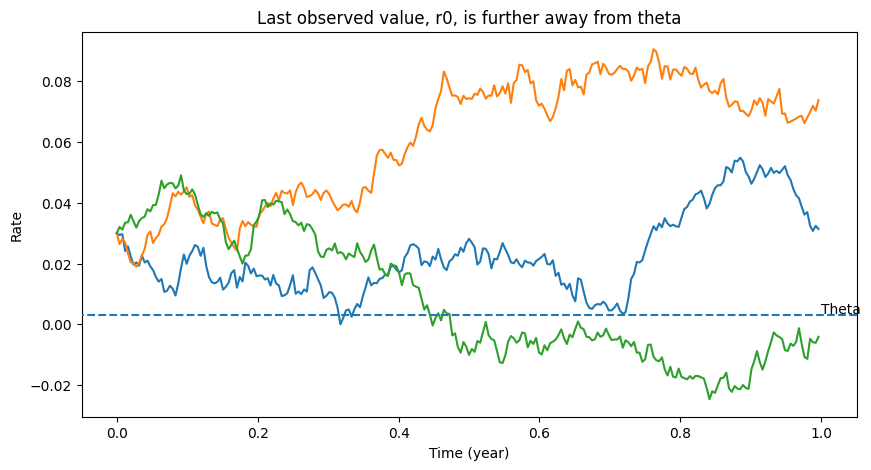

In [26]:
M = 10
N=252
theta= 0.003
t = np.arange(0,N)/252
rates_arr = VasicekMultiSim(M=3, N=252, r0= 0.03, kappa = 0.03, theta=theta, sigma=0.04)
plt.figure(figsize=(10,5))
plt.plot(t,rates_arr)
plt.hlines(y=theta, xmin = -100, xmax=100, zorder=10, linestyles = 'dashed', label='Theta')
plt.annotate('Theta', xy=(1.0, theta+0.0005))
plt.xlim(-0.05, 1.05)
plt.ylabel("Rate")
plt.xlabel("Time (year)")
plt.title('Last observed value, r0, is further away from theta')
plt.show()

<AxesSubplot: >

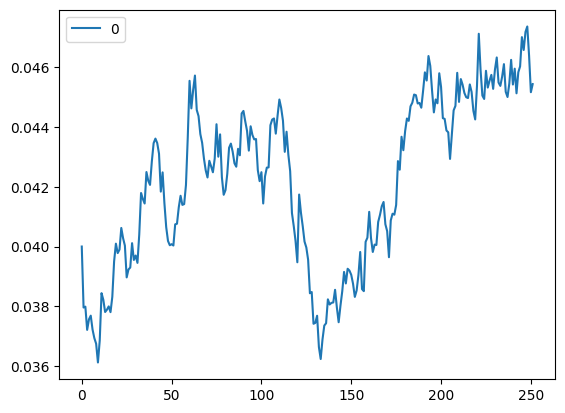

In [21]:
gbm_path = pd.DataFrame(shortRatePath_CIR(r0=0.04, a =0.2, b =0.041, sigma =0.05, T= 1, steps =252))
gbm_path.plot()


In [27]:

def zeroBondPricerCIR(r0, a, b, sigma, T, steps, simulation_size):
    
    N= simulation_size
    call_hat, CI, MSE = [], [], [] 
    eff_CR,abs_error_CR =[], [] 
    tempsum = 0
    tempsum2 = 0
    
    for i in range(1,N):
        
        integral_approx = aggRatePath_CIR(r0, a, b , sigma, T, steps)
        zero_cp_price =  np.exp(-integral_approx)
        
        tempsum += zero_cp_price
        tempsum2 += zero_cp_price**2
       
    crude_MC = tempsum / N # compute crude Monte Carlo

    # compute variance of crude MC
    s2 = tempsum2/(N-1) - (N/(N-1))*crude_MC**2
    mse = s2/N
    upper_CI = crude_MC +1.96*(mse**0.5)
    lower_CI = crude_MC -1.96*(mse**0.5)
    ci = [lower_CI, upper_CI]

    #efficiency
    true_value =0.9607132917045287
    eff = 1 / mse
    error = abs(true_value - crude_MC)

    call_hat.append(crude_MC)
    MSE.append(mse)
    CI.append(ci)
    eff_CR.append(eff)
    abs_error_CR.append(error)

    results_crude_MC = pd.DataFrame({'N':simulation_size, 'Zero coupon Price':call_hat, 'MSE':MSE, '95% CI':CI,
                                     'Abs. Error': abs_error_CR, 'Efficiency': eff_CR })


    return results_crude_MC

In [28]:
# True value  = 0.9607132917045287 from 3c at T=1

zeroBondPricerCIR(r0=0.04, a =0.2, b =0.041, sigma =0.05, T= 1, steps =252, simulation_size = 10**4)

,N,Zero coupon Price,MSE,95% CI,Abs. Error,Efficiency
0,10000,0.960804,1.191231e-08,"[0.9605903233508936, 0.9610181659838556]",0.000091,8.394678e+07
